![tutorial banner](images/PVLib_PVPMCLogo.PNG)


# Welcome! 

Welcome to the PVPMC 2022 Tutorial: Data and tools to model PV Systems

Modeling tools for all aspects of photovoltaic systems are rapidly growing, and there are solutions for many of the things you might want to simulate. Python is becoming one of the scientific languages of choice, and many open-source tools are available for PV modeling. This tutorial will focus on teaching attendees PV modeling in python through the use of PVlib. 

In this interactive tutorial we will go from getting acquainted with some common data used or measured in pv systems (i.e. weather), to modeling the AC energy output of a single-axis tracker system. This includes learning and simulating sun position, plane of array irradiances, temperature models, single-diode models and more. 

We will review common vocabulary around python and ``data aggregation`` by hour, week, month, and visualization. 

The tutorial will present hands-on examples in python, enabled via jupyter notebooks and a Jupyterhub (remote hosted server for jupyter notebooks and python language) so you, the attendee, don’t have to install anything, and can follow along while we go over the theory and code! In case it's not obvious, a computer <b> is </b> required.  

The tutorial will wrap up with an overview of other available open-source tools for other aspects of modeling PV systems. 


## More on your teachers:

The three of us have ample experience in data, coding, and PV field performance modeling, so we look forward to all of your questions.

| | |
| --- | :--- |
| ![Silvana Ovaitt](images/tutorial_0_silvana.PNG) | <h2>Silvana Ovaitt</h2><br/>I am a research scientist at NREL, focusing mostly on bifacial PV system's performance, and circular economy. Python is my daily bread and butter for data analysis and building tools. Silvana has made substantial contributions to the NREL  [bifacial radiance](https://bifacial-radiance.readthedocs.io/en/latest/) software packages, [bifacialvf pvmismatch](https://github.com/NREL/bifacialvf), and [PV in Circular Economy (PV_ICE)](https://github.com/NREL/PV_ICE) tools. |
| ![Kevin Anderson](images/tutorial_0_kevin.PNG) | <h2>Kevin Anderson</h2><br/>I am a research scientist at NREL doing cool stuff! I have contributed to work on slope aware backtracking, clipping loss errors in hourly yield estimates, and am a maintainer for [pvlib python](https://pvlib-python.readthedocs.io/en/stable/) and a frequent contributor to [RdTools](https://rdtools.readthedocs.io/en/stable/). |
| ![Mark Mikofski](images/tutorial_0_mark.PNG) | <h2>Mark Mikofski</h2><br/>I am a principal solar engineer at DNV and team lead for special projects in solar energy assessments. I research, analyze, and predict PV system performance, degradation, and reliability. I have contributed to a few Python projects like [pvlib python](https://pvlib-python.readthedocs.io/en/stable/), [PVMismatch](https://sunpower.github.io/PVMismatch/), and [SciPy](https://scipy.org/) |


## Learning Objectives

0.  Why Open-Source PV Modelling? 
1.	Access weather data (TMY3), understand irradiance data, and visualize it monthly.
2.	Calculate sun position, plane of array irradiance, and aggregate irradiance data into average daily insolation by month and year.
3.	Calculate module temperature from ambient data. 
4.	Use POA and module temperature to forecast a module's performance. 
5.  Other Tools

## Overview
The sketch below from [the Sandia PV Performance Modeling Collaborative (PVPMC)](https://pvpmc.sandia.gov/) outlines the topics we will cover in this tutorial:

![Overview](images/tutorial_overview.PNG)

### Why learn this? 

PV-lib is a library of algorithms and routines that you might encounter the need to use if you're doing anything PV-modeling related.  It is managed by members of the PV research community, who make sure the formulas and code are not only sleek but accurate. 

* You want to know the sun position? No need to code from zero the SPA (Solar Position algorithm), it's in PVlib. 

* You want to reproduce the Sandia-King model to calculate module performance? It's there, also. 

* You can find the most well-known [models](https://pvpmc.sandia.gov/), as well as recently accepted values and approaches in published PV literature.

* We hope adding this tool to your skillset will empower you to do better, faster research with an already solid foundation. Don't reinvent the wheel!

## How to use this tutorial?

This tutorial is a [Jupyter](https://jupyter.org) notebook. Jupyter is a browser based interactive tool that combines text, images, equations, and code that can be shared with others. Please see the setup section in the [README](./README.md) to learn more about how to get started.

## Useful links

1. References
    * [PVlib Documentation](https://pvlib-python.readthedocs.io/en/stable/)
    * [Github Code Repository](https://github.com/pvlib/pvlib-python)
2. Ask for help:
    * [Use the pvlib-python tag on StackOverflow](https://stackoverflow.com/questions/tagged/pvlib-python)
    * [Google Group - Discussions and more!](https://groups.google.com/g/pvlib-python)
    * [Open an Issue on the Github Repository](https://github.com/pyvlib/pvlib-python/issues)

## Tutorial Structure

This tutorial is made up of multiple Jupyter Notebooks. These notebooks mix
code, text, visualization, and exercises.

If you haven't used JupyterLab before, it's similar to the Jupyter Notebook. If
you haven't used the Notebook, the quick intro is

1. There are two modes: ``command`` and ``edit``

1. From ``command`` mode, press `Enter` to edit a cell (like this markdown cell)

1. From ``edit`` mode, press `Esc` to change to command mode
1. Press `shift+enter` to execute a cell and move to the next cell.
1. The toolbar has commands for executing, converting, and creating cells.

The layout of the tutorial will be as follows:



In [ ]:
# if running on google colab, uncomment the next line and execute this cell to install the dependencies and prevent "ModuleNotFoundError" in later cells:
# !pip install -r https://raw.githubusercontent.com/PVSC-Python-Tutorials/PVPMC_2022/main/requirements.txt

## Exercise: Print Hello, world!

Each notebook will have exercises for you to solve. You'll be given a blank or
partially completed cell, followed by a hidden cell with a solution. For
example.

Print the text "Hello, world!".


In [1]:
# Your code here
print("Hello, world!")

Hello, world!


## Exercise 1: Modify to print something else:

In [ ]:
my_string =    # Add your text here. Remember to put it inside of single quotes or double quotes ( " " or '' )
print(my_string)

## Let's go over some Python Concepts

(A lot of this examples were shamely taken from https://jckantor.github.io/CBE30338/01.01-Getting-Started-with-Python-and-Jupyter-Notebooks.html :$)


## Basic Arithmetic Operations

Basic arithmetic operations are built into the Python langauge. Here are some examples. In particular, note that exponentiation is done with the ** operator.

In [2]:
a = 2
b = 3
print(a + b)
print(a ** b)
print(a / b)

5
8
0.6666666666666666


## Python Libraries

The Python language has only very basic operations. Most math functions are in various math libraries. The numpy library is convenient library. This next cell shows how to import numpy with the prefix np, then use it to call a common mathematical functions.

In [3]:
import numpy as np

# mathematical constants
print(np.pi)
print(np.e)

# trignometric functions
angle = np.pi/4
print(np.sin(angle))
print(np.cos(angle))
print(np.tan(angle))

3.141592653589793
2.718281828459045
0.7071067811865476
0.7071067811865476
0.9999999999999999


Lists are a versatile way of organizing your data in Python. Here are some examples, more can be found on this Khan Academy video.

In [4]:
xList = [1, 2, 3, 4]
xList

[1, 2, 3, 4]

## Concatenation

Concatentation is the operation of joining one list to another.

In [5]:
x = [1, 2, 3, 4];
y = [5, 6, 7, 8];

x + y

[1, 2, 3, 4, 5, 6, 7, 8]

In [6]:
np.sum(x)

10

## Loops

In [7]:
for x in xList:
    print("sin({0}) = {1:8.5f}".format(x,np.sin(x)))

sin(1) =  0.84147
sin(2) =  0.90930
sin(3) =  0.14112
sin(4) = -0.75680


## Working with Dictionaries

Dictionaries are useful for storing and retrieving data as key-value pairs. For example, here is a short dictionary of molar masses. The keys are molecular formulas, and the values are the corresponding molar masses.


In [8]:
States_SolarInstallations2020 = {'Arizona': 16.04, 'California': 30.02, 'Texas':18.00, 'Colorado': 44.01}  # GW
States_SolarInstallations2020

{'Arizona': 16.04, 'California': 30.02, 'Texas': 18.0, 'Colorado': 44.01}

We can a value to an existing dictionary.


In [9]:
States_SolarInstallations2020['New Mexico'] = 22.4


## Plotting

Importing the matplotlib.pyplot library gives IPython notebooks plotting functionality very similar to Matlab's. Here are some examples using functions from the

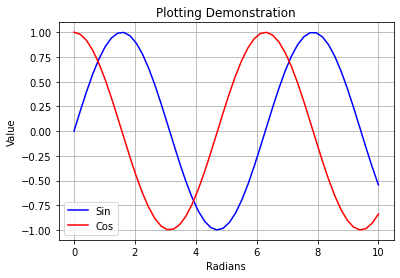

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10)
y = np.sin(x)
z = np.cos(x)

plt.plot(x,y,'b',x,z,'r')
plt.xlabel('Radians');
plt.ylabel('Value');
plt.title('Plotting Demonstration')
plt.legend(['Sin','Cos'])
plt.grid()

## Going Deeper

We've designed the notebooks above to cover the basics of pvlib from beginning
to end. To help you go deeper, we've also create a list of notebooks that
demonstrate real-world applications of pvlib in a variety of use cases. These
need not be explored in any particular sequence, instead they are meant to
provide a sampling of what pvlib can be used for.

### PVLIB and Weather/Climate Model Data

Check out the pvlib python [examples gallery](https://pvlib-python.readthedocs.io/en/stable/gallery/index.html).
Start with [Sun path diagram](https://pvlib-python.readthedocs.io/en/stable/gallery/solar-position/plot_sunpath_diagrams.html),
then feel free to explore the rest of the notebooks.

### Open PV Tools

There is a curated list of [open source PV tools](https://openpvtools.readthedocs.io/) from ["Review of Open Source Tools for PV Modeling" by Will Holmgren, _et al._ at IEEE 7th World Conference on PV Energy Conversion 2018](http://dx.doi.org/10.1109/PVSC.2018.8548231).

# Why Open PV Tools?

* "In 2016, the ``FAIR Guiding Principles for scientific data management and stewardship`` were published in Scientific Data. The authors intended to provide guidelines to improve the Findability, Accessibility, Interoperability, and Reuse of digital assets. "

* Not reinventing the wheel

* Increase exposure and Help close the gap of availability of STEM resources for underseved communities


[![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)](http://creativecommons.org/licenses/by/4.0/)

This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).